1️⃣ Montage et Exploration du Dataset

Montage de Google Drive
Exploration des dossiers d'images et comptage des classes


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


****Importation des bibliothèques****

In [ ]:
from PIL import ImageOps
from tensorflow.keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

**Affichage des sous-dossiers**

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/image_dataset"
folders = ["Training", "Testing"]

for folder in folders:
    path = os.path.join(dataset_path, folder)
    if os.path.exists(path):
        print(f"📂 {folder} trouvé!")
        for cls in os.listdir(path):
            class_path = os.path.join(path, cls)
            if os.path.isdir(class_path):
                print(f"   📁 {cls}: {len(os.listdir(class_path))} images")
    else:
        print(f"⚠️ {folder} non trouvé!")


📂 Training trouvé!
   📁 meningioma_tumor: 822 images
   📁 no_tumor: 395 images
   📁 glioma_tumor: 826 images
   📁 pituitary_tumor: 827 images
📂 Testing trouvé!
   📁 pituitary_tumor: 73 images
   📁 no_tumor: 104 images
   📁 glioma_tumor: 86 images
   📁 meningioma_tumor: 114 images


In [ ]:
import tensorflow as tf
import os

# Chemins vers les répertoires de données sur Google Drive
train_path = "/content/drive/My Drive/image_dataset/Training"
test_path = "/content/drive/My Drive/image_dataset/Testing"

# Taille des images à redimensionner pour le modèle
img_size = (224, 224)
batch_size = 32

# Chargement des datasets depuis les répertoires avec étiquettes (classification multi-classes)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"  # Mode de classification multi-classes
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

print("✅ Données chargées avec succès !")


Found 2870 files belonging to 4 classes.
Found 377 files belonging to 4 classes.
✅ Données chargées avec succès !


2️⃣ Chargement et Préparation des Données


In [ ]:
import os
import pandas as pd

train_path = "/content/drive/My Drive/image_dataset/Training"

classes = os.listdir(train_path)
data = {}

for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    data[class_name] = len(os.listdir(class_path))

df = pd.DataFrame(list(data.items()), columns=["Classe", "Nombre d'images"])
print(df)


             Classe  Nombre d'images
0  meningioma_tumor              822
1          no_tumor              395
2      glioma_tumor              826
3   pituitary_tumor              827


**Création d'un DataFrame pour les chemins d'images et les étiquettes des classes**

In [ ]:
import os
import pandas as pd

train_path = "/content/drive/My Drive/image_dataset/Training"


file_paths = []
labels = []

# Parcours des classes
for class_name in os.listdir(train_path):
    class_path = os.path.join(train_path, class_name)

    # Vérifier que c'est bien un dossier
    if os.path.isdir(class_path):
        for img in os.listdir(class_path):
            file_paths.append(os.path.join(class_path, img))
            labels.append(class_name)

# Création du DataFrame
df_train = pd.DataFrame({"paths": file_paths, "label": labels})


print(df_train.head())

print("\nNombre d'images par classe :")
print(df_train["label"].value_counts())

                                               paths             label
0  /content/drive/My Drive/image_dataset/Training...  meningioma_tumor
1  /content/drive/My Drive/image_dataset/Training...  meningioma_tumor
2  /content/drive/My Drive/image_dataset/Training...  meningioma_tumor
3  /content/drive/My Drive/image_dataset/Training...  meningioma_tumor
4  /content/drive/My Drive/image_dataset/Training...  meningioma_tumor

Nombre d'images par classe :
label
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
Name: count, dtype: int64


**Création d'un DataFrame pour les chemins d'images et les étiquettes des classes du dataset de test**

In [ ]:
test_path = "/content/drive/My Drive/image_dataset/Testing"

file_paths_test = []
labels_test = []

# Parcours des classes
for class_name in os.listdir(test_path):
    class_path = os.path.join(test_path, class_name)

    # Vérifier que c'est bien un dossier
    if os.path.isdir(class_path):
        for img in os.listdir(class_path):
            file_paths_test.append(os.path.join(class_path, img))
            labels_test.append(class_name)

# Création du DataFrame pour le test
df_test = pd.DataFrame({"paths": file_paths_test, "label": labels_test})

print(df_test.head())

print("\nNombre d'images par classe (test) :")
print(df_test["label"].value_counts())

                                               paths            label
0  /content/drive/My Drive/image_dataset/Testing/...  pituitary_tumor
1  /content/drive/My Drive/image_dataset/Testing/...  pituitary_tumor
2  /content/drive/My Drive/image_dataset/Testing/...  pituitary_tumor
3  /content/drive/My Drive/image_dataset/Testing/...  pituitary_tumor
4  /content/drive/My Drive/image_dataset/Testing/...  pituitary_tumor

Nombre d'images par classe (test) :
label
meningioma_tumor    114
no_tumor            104
glioma_tumor         86
pituitary_tumor      73
Name: count, dtype: int64


**Affichage de la distribution des classes en pourcentage dans le dataset d'entraînement**

In [ ]:
print("Distribution des classes (train) :")
print(df_train["label"].value_counts(normalize=True))

Distribution des classes (train) :
label
pituitary_tumor     0.288153
glioma_tumor        0.287805
meningioma_tumor    0.286411
no_tumor            0.137631
Name: proportion, dtype: float64


**Afficher la distribution des classes en pourcentage dans le test**

In [ ]:
print("\nDistribution des classes (test) :")
print(df_test["label"].value_counts(normalize=True))


Distribution des classes (test) :
label
meningioma_tumor    0.302387
no_tumor            0.275862
glioma_tumor        0.228117
pituitary_tumor     0.193634
Name: proportion, dtype: float64


**Visualisation de la distribution des classes**

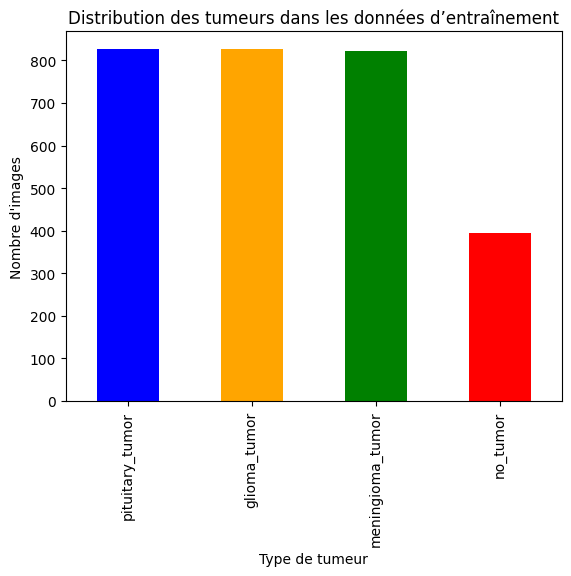

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_train["label"].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
ax.set_title('Distribution des tumeurs dans les données d’entraînement')
ax.set_ylabel('Nombre d\'images')
ax.set_xlabel('Type de tumeur')
plt.show()

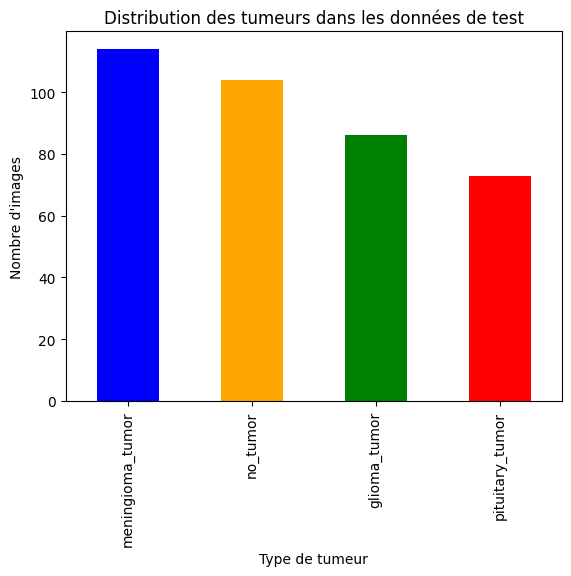

In [ ]:
fig, ax = plt.subplots()
df_test["label"].value_counts().plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
ax.set_title('Distribution des tumeurs dans les données de test')
ax.set_ylabel('Nombre d\'images')
ax.set_xlabel('Type de tumeur')
plt.show()

**Affichage d'un échantillon d'images du dataset d'entraînement**

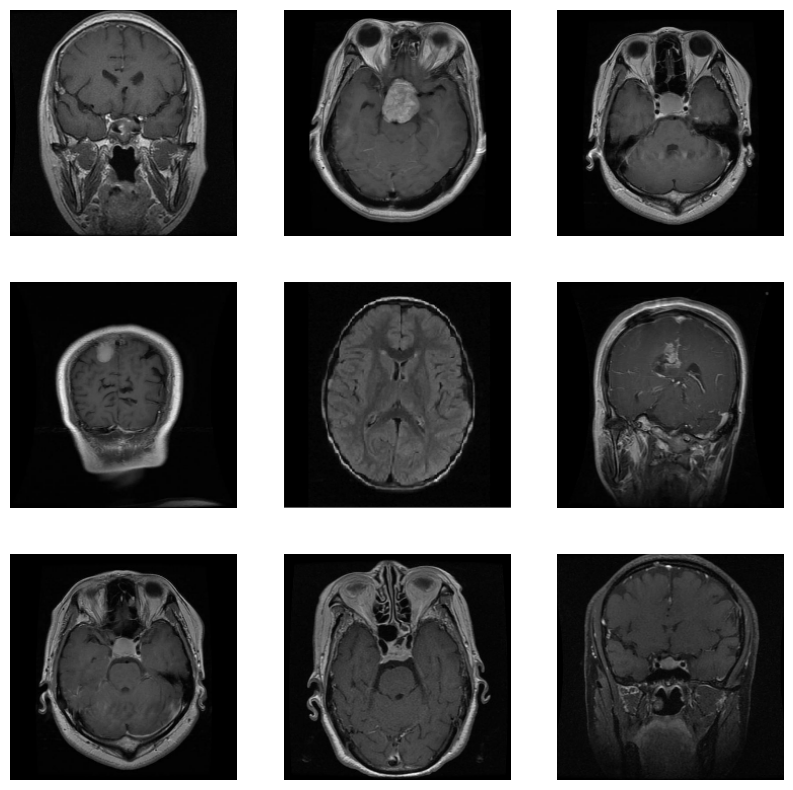

In [ ]:
import matplotlib.pyplot as plt

# Extraire un batch d'images
sample_images, sample_labels = next(iter(train_ds))

# Convertir en NumPy avant d'afficher
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    plt.axis("off")
plt.show()


Équilibrage des classes : Dans le dataset, les classes présentent un nombre d'images très variable (par exemple, "no_tumor" avec 395 images et "pituitary_tumor" avec 827). Ce déséquilibre peut mener à un biais où le modèle se focalise davantage sur les classes majoritaires. L'augmentation des données permet d'augmenter le nombre d'exemples dans les classes sous-représentées, assurant ainsi un meilleur équilibre et permettant au modèle d'apprendre de manière plus homogène, ce qui améliore la performance sur toutes les classes.

Uniformisation des tailles d'images avec Padding : Le padding est une technique cruciale pour assurer que toutes les images ont la même taille, ce qui est indispensable pour un traitement cohérent par le modèle. Lorsque les images d'entrée ont des dimensions différentes, le padding permet d'ajouter des pixels autour de l'image pour l'amener à la taille souhaitée, tout en préservant les informations visuelles de l'image. Cette uniformité est nécessaire pour que le modèle puisse traiter toutes les images de manière efficace, sans perdre d'information importante ni déformer l'image d'origine. En utilisant le padding en combinaison avec l'augmentation de données, il devient possible de maintenir des images équilibrées et homogènes tout en améliorant la capacité du modèle à généraliser.

****3️⃣ Augmentation et Prétraitement des Données****

**Augmentation des images pour équilibrer les classes**

In [ ]:
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tqdm import tqdm

# Définition des chemins
data_dir = "/content/drive/My Drive/image_dataset/Training"
classes = ["no_tumor", "glioma_tumor", "meningioma_tumor"]
min_images = 827

# Configuration de l'augmentation des données
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    num_images = len(images)

    if num_images < min_images:
        print(f"Augmentation pour la classe {class_name}, images actuelles: {num_images}")
        images_needed = min_images - num_images

        for i in tqdm(range(images_needed)):
            img_name = random.choice(images)
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path)  # Charger l'image
            img_array = img_to_array(img)  # Convertir en tableau
            img_array = np.expand_dims(img_array, axis=0)

            aug_iter = datagen.flow(img_array, batch_size=1)
            aug_img = next(aug_iter)[0].astype(np.uint8)

            aug_img_pil = array_to_img(aug_img)
            new_img_name = f"aug_{i}_{img_name}"
            aug_img_pil.save(os.path.join(class_path, new_img_name))

print("Data augmentation terminée.")

Augmentation pour la classe no_tumor, images actuelles: 395


100%|██████████| 432/432 [00:36<00:00, 11.93it/s]


Augmentation pour la classe glioma_tumor, images actuelles: 826


100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


Augmentation pour la classe meningioma_tumor, images actuelles: 822


100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

Data augmentation terminée.


**Vérification du nombre d'images après l'augmentation**

In [ ]:
import os
import pandas as pd

# Vérifier le nombre d'images par classe dans le dossier d'entraînement
train_path = "/content/drive/My Drive/image_dataset/Training"

classes = os.listdir(train_path)
data = {}

for class_name in classes:
    class_path = os.path.join(train_path, class_name)
    data[class_name] = len(os.listdir(class_path))

df = pd.DataFrame(list(data.items()), columns=["Classe", "Nombre d'images"])
print(df)

             Classe  Nombre d'images
0          no_tumor              827
1      glioma_tumor              827
2   pituitary_tumor              827
3  meningioma_tumor              827


**Application de padding pour uniformiser les dimensions**


In [ ]:
from PIL import Image

# Fonction pour appliquer le padding
def pad_image(image, target_size):
    delta_width = target_size[0] - image.size[0]
    delta_height = target_size[1] - image.size[1]
    padding = (delta_width // 2, delta_height // 2)
    padding = (padding[0], padding[1], delta_width - padding[0], delta_height - padding[1])
    return ImageOps.expand(image, padding, fill='black')  # Remplir avec du noir ou une autre couleur

# Déterminer la taille maximale
max_width = 0
max_height = 0

# Parcourir toutes les classes et les images pour trouver la taille maximale
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        max_width = max(max_width, img.size[0])
        max_height = max(max_height, img.size[1])

target_size = (max_width, max_height)

# Appliquer le padding
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)

    for img_name in tqdm(images):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)

        if img.size != target_size:
            padded_img = pad_image(img, target_size)
            padded_img.save(img_path)  # Écraser l'ancienne image ou enregistrer sous un nouveau nom

print("Padding appliqué aux images.")

100%|██████████| 827/827 [00:25<00:00, 32.35it/s]

Padding appliqué aux images.


**Vérification des dimensions des images par classe**

In [ ]:
import os
from PIL import Image

# Définition du chemin vers le dataset
data_dir = "/content/drive/My Drive/image_dataset/Training"
classes = ["no_tumor", "glioma_tumor", "pituitary_tumor", "meningioma_tumor"]

# Dictionnaire pour stocker les dimensions uniques par classe
dimensions_per_class = {}

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    unique_sizes = set()

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)
        except Exception as e:
            print(f"Erreur avec {img_path}: {e}")

    dimensions_per_class[class_name] = unique_sizes

# Afficher les dimensions uniques trouvées par classe
for class_name, sizes in dimensions_per_class.items():
    print(f"📁 {class_name}: {sizes}")


📁 no_tumor: {(1375, 1446)}
📁 glioma_tumor: {(1375, 1446)}
📁 pituitary_tumor: {(1375, 1446)}
📁 meningioma_tumor: {(1375, 1446)}


**Normalisation des images**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tqdm import tqdm

# Définition des chemins
data_dir = "/content/drive/My Drive/image_dataset/Training"
output_dir = "/content/drive/My Drive/image_dataset/Normalized_Training"
classes = ["no_tumor", "glioma_tumor", "pituitary_tumor", "meningioma_tumor"]

# Création des dossiers de sortie
os.makedirs(output_dir, exist_ok=True)

for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    save_path = os.path.join(output_dir, f"normalized_{class_name}")
    os.makedirs(save_path, exist_ok=True)

    images = os.listdir(class_path)

    print(f"🔄 Normalisation des images pour la classe {class_name}...")

    for img_name in tqdm(images):
        img_path = os.path.join(class_path, img_name)

        # Charger l'image
        img = load_img(img_path)
        img_array = img_to_array(img)  # Convertir en tableau NumPy

        # Normalisation des pixels entre 0 et 1
        img_array = img_array / 255.0

        # Conversion en image et sauvegarde
        norm_img = array_to_img(img_array)
        norm_img.save(os.path.join(save_path, img_name))

print("✅ Normalisation terminée pour toutes les classes !")


🔄 Normalisation des images pour la classe no_tumor...


100%|██████████| 827/827 [01:06<00:00, 12.44it/s]


🔄 Normalisation des images pour la classe glioma_tumor...


100%|██████████| 827/827 [01:04<00:00, 12.77it/s]


🔄 Normalisation des images pour la classe pituitary_tumor...


100%|██████████| 827/827 [01:23<00:00,  9.93it/s]


🔄 Normalisation des images pour la classe meningioma_tumor...


100%|██████████| 827/827 [01:07<00:00, 12.32it/s]

✅ Normalisation terminée pour toutes les classes !


**4️⃣ Construction et Préparation du Dataset Final**

**Fusion des images normalisées dans un dataset final**

In [ ]:
import os
import shutil

# Chemins
final_dataset_dir = "/content/drive/My Drive/image_dataset/Final_Preprocessed"
normalized_dir = "/content/drive/My Drive/image_dataset/Normalized_Training"

# Création du dossier final
os.makedirs(final_dataset_dir, exist_ok=True)

# Copier les dossiers normalisés dans le dossier final
for class_name in ["no_tumor", "glioma_tumor", "pituitary_tumor", "meningioma_tumor"]:
    src_path = os.path.join(normalized_dir, f"normalized_{class_name}")
    dest_path = os.path.join(final_dataset_dir, class_name)  # Sauvegarde sous le vrai nom des classes

    if os.path.exists(src_path):
        shutil.copytree(src_path, dest_path, dirs_exist_ok=True)
        print(f"✅ {class_name} copié dans {final_dataset_dir}")

print("🚀 Sauvegarde du dataset final terminée !")


✅ no_tumor copié dans /content/drive/My Drive/image_dataset/Final_Preprocessed
✅ glioma_tumor copié dans /content/drive/My Drive/image_dataset/Final_Preprocessed
✅ pituitary_tumor copié dans /content/drive/My Drive/image_dataset/Final_Preprocessed
✅ meningioma_tumor copié dans /content/drive/My Drive/image_dataset/Final_Preprocessed
🚀 Sauvegarde du dataset final terminée !


**Chargement des données finales pour l'entraînement et la validation**

In [ ]:
import tensorflow as tf
import os

# Définition des chemins
dataset_path = "/content/drive/My Drive/image_dataset/Final_Preprocessed"
img_size = (224, 224)  # Taille standard pour le CNN
batch_size = 32

# Chargement des datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",  # Classification multi-classes
    validation_split=0.2,  # 20% pour la validation
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical",
    validation_split=0.2,
    subset="validation",
    seed=42
)

# Normalisation des pixels (0 à 1)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

print("✅ Dataset chargé et normalisé !")


Found 3308 files belonging to 4 classes.
Using 2647 files for training.
Found 3308 files belonging to 4 classes.
Using 661 files for validation.
✅ Dataset chargé et normalisé !


**5️⃣ Conception et Entraînement du Modèle CNN**

1.   CNN from scratch



In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
# Listes pour stocker les résultats
learning_rates = [1e-4]
results = {}

# Boucle sur les taux d'apprentissage
for lr in learning_rates:
    print(f"\nEntraînement avec un taux d'apprentissage de : {lr}")

    # Réinitialiser le modèle
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Callbacks pour l'entraînement
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

    # Entraînement du modèle
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=20,
        callbacks=[early_stopping, lr_scheduler]
    )

    # Évaluer la performance sur les données de validation
    val_loss, val_accuracy = model.evaluate(val_ds)
    results[lr] = {'val_loss': val_loss, 'val_accuracy': val_accuracy}
    print(f"Taux d'apprentissage : {lr}, Perte de validation : {val_loss}, Précision de validation : {val_accuracy}")

# Résumé des résultats
for lr, metrics in results.items():
    print(f"Taux d'apprentissage : {lr} - Perte de validation : {metrics['val_loss']}, Précision de validation : {metrics['val_accuracy']}")


Entraînement avec un taux d'apprentissage de : 0.0001
Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.5140 - loss: 1.1540 - val_accuracy: 0.6611 - val_loss: 0.8455 - learning_rate: 1.0000e-04
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 433s 5s/step - accuracy: 0.6401 - loss: 0.8528 - val_accuracy: 0.7095 - val_loss: 0.7398 - learning_rate: 1.0000e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 385s 5s/step - accuracy: 0.6888 - loss: 0.7598 - val_accuracy: 0.7413 - val_loss: 0.6927 - learning_rate: 1.0000e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.7203 - loss: 0.7014 - val_accuracy: 0.7610 - val_loss: 0.6455 - learning_rate: 1.0000e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 372s 4s/step - accuracy: 0.7600 - loss: 0.6016 - val_accuracy: 0.7625 - val_loss: 0.6449 - learning_rate: 1.0000e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 377s 4s/step - accuracy: 0.7732 - loss: 0.5645 - val_accuracy: 0.7943 - val_loss: 0.6243 - learning_rate: 1.0000e-04
Epoch 7/20
83/8

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,508,430 (127.82 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,954 (85.22 MB)

Le modèle a montré une amélioration constante de la précision d'entraînement et de validation au fil des époques, atteignant une précision de validation de 84.4% à l'Époch 13. La perte de validation a diminué progressivement, atteignant 0.5186. Le taux d'apprentissage a été réduit par le mécanisme ReduceLROnPlateau après l'Époch 12, ce qui a permis d'ajuster plus finement les poids du modèle pour continuer à améliorer ses performances. La précision de validation finale montre que le modèle a bien généralisé sur les données de validation, malgré des fluctuations légères dans certaines époques.









**Courbes de précision et de perte d'entraînement et de validation**



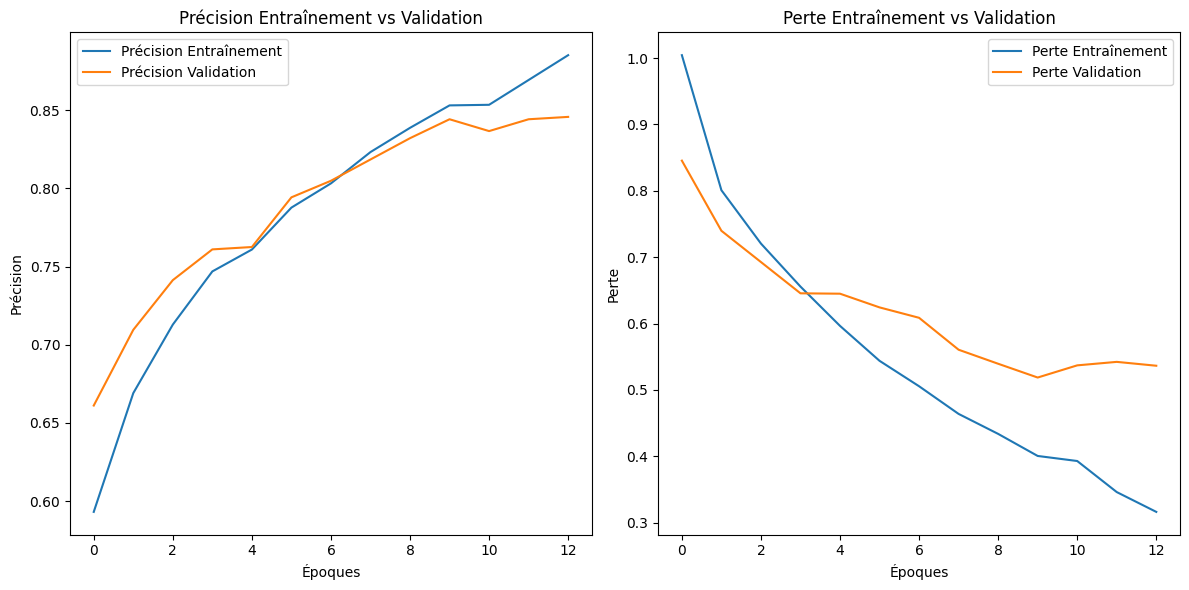

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les historiques de précision et de perte
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Tracer la précision d'entraînement et de validation
plt.figure(figsize=(12, 6))

# Tracer la précision
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Précision Entraînement')
plt.plot(val_accuracy, label='Précision Validation')
plt.title('Précision Entraînement vs Validation')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Tracer la perte
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Perte Entraînement')
plt.plot(val_loss, label='Perte Validation')
plt.title('Perte Entraînement vs Validation')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Afficher la courbe
plt.tight_layout()
plt.show()

**Enregistrement du modèle entraîné sur Google Drive**

In [ ]:
# Définir le chemin pour enregistrer le modèle
save_path = '/content/drive/My Drive/image_dataset/Classic_Model.keras'

# Enregistrer le modèle
model.save(save_path)

**Prédictions sur de nouvelles images**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# Chemin vers le dossier contenant les nouvelles images de test
new_images_dir = '/content/drive/My Drive/image_dataset/Testing'

# Définir les dimensions des images
image_height = 224  # Remplacez par la hauteur de vos images
image_width = 224   # Remplacez par la largeur de vos images

# Liste des nouvelles images dans tous les sous-dossiers
new_images = []
for root, dirs, files in os.walk(new_images_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Filtrer uniquement les fichiers image
            new_images.append(os.path.join(root, file))

# Afficher les fichiers trouvés
print(f"Fichiers trouvés : {new_images}")

# Vérifier s'il y a des images à traiter
if not new_images:
    print("Aucune image trouvée dans le dossier.")
else:
    # Préparer les images pour les prédictions
    predictions = []
    for img_path in new_images:
        img = image.load_img(img_path, target_size=(image_height, image_width))  # Charger l'image
        img_array = image.img_to_array(img) / 255.0  # Normaliser l'image

        img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour le batch
        pred = model.predict(img_array)  # Faire une prédiction
        predictions.append(pred)

    # Afficher les prédictions
    for img_path, pred in zip(new_images, predictions):
        print(f"Image: {img_path}, Prediction: {pred}")


Fichiers trouvés : ['/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(11).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(20).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(38).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(34).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(21).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(19).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(41).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(22).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(18).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(3).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(23).jpg', '/content/drive/My Drive/image_dataset/Testing/pituitary_tumor/image(30).jpg', '/content/drive/My Drive/image_da

**6️⃣ Évaluation et Analyse des Performances**

**Évaluation du modèle sur les ensembles de validation**

In [ ]:
# Évaluer le modèle sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(val_ds)

print(f"📊 Performance sur l'ensemble de validation :")
print(f"✅ Accuracy : {val_accuracy * 100:.2f}%")
print(f"❌ Loss : {val_loss:.4f}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8447 - loss: 0.5344
📊 Performance sur l'ensemble de validation :
✅ Accuracy : 84.42%
❌ Loss : 0.5186


Le modèle a obtenu une précision de 84.42% sur l'ensemble de validation, ce qui indique une bonne capacité de généralisation.

**Sauvegarde des prédictions dans un fichier CSV**

In [ ]:
import pandas as pd

# Sauvegarder les résultats dans un DataFrame pandas
prediction_data = {
    'Image Path': new_images,
    'Prediction': [pred[0] for pred in predictions]  # Flatten the prediction array
}
df_predictions = pd.DataFrame(prediction_data)

# Sauvegarder le DataFrame dans un fichier CSV
output_csv_path = '/content/drive/My Drive/image_dataset/predictions1.csv'  # Chemin de sauvegarde du fichier CSV
df_predictions.to_csv(output_csv_path, index=False)

print(f"Prédictions sauvegardées dans : {output_csv_path}")


Prédictions sauvegardées dans : /content/drive/My Drive/image_dataset/predictions1.csv


2. ResNet50 (fine-tuning)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50  # Import de ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Générateurs de données sans preprocessing
train_datagen = ImageDataGenerator()  # Pas de prétraitement
val_datagen = ImageDataGenerator()  # Pas de prétraitement pour la validation aussi

# Chargement des données sans modification (utilisation du même dossier pour train et validation)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/image_dataset/Training',  # Dossier d'entraînement
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/My Drive/image_dataset/Training',  # Utiliser le même dossier ici
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Définition du modèle avec ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # On gèle le modèle pré-entraîné

# Construction du modèle
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping sur l'exactitude de validation
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Résumé du modèle
model.summary()

Found 3308 images belonging to 4 classes.
Found 3308 images belonging to 4 classes.
Epoch 1/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1293s 12s/step - accuracy: 0.6070 - loss: 2.1978 - val_accuracy: 0.8374 - val_loss: 1.1226
Epoch 2/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1384s 13s/step - accuracy: 0.8108 - loss: 1.1288 - val_accuracy: 0.8419 - val_loss: 0.8959
Epoch 3/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1322s 13s/step - accuracy: 0.8145 - loss: 0.9195 - val_accuracy: 0.8634 - val_loss: 0.7205
Epoch 4/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1290s 12s/step - accuracy: 0.8203 - loss: 0.8139 - val_accuracy: 0.8824 - val_loss: 0.6428
Epoch 5/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1317s 13s/step - accuracy: 0.8342 - loss: 0.7110 - val_accuracy: 0.8885 - val_loss: 0.5748
Epoch 6/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1293s 12s/step - accuracy: 0.8360 - loss: 0.6771 - val_accuracy: 0.8658 - val_loss: 0.5895
Epoch 7/20
104/104 ━━━━━━━━━━━━━━━━━━━━ 1284s 12s/step - accuracy: 0.8499 - loss: 0.6222 - val_accuracy: 0.8455 - val_loss: 0.6110

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_16          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,894,542 (114.04 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 4,204,554 (16.04 MB)

Le modèle a montré une amélioration progressive de la précision au fil des époques, atteignant 84.13% à la fin de l'époque 8. Cependant, la perte de validation a varié, se stabilisant autour de 0.5172.

**Chargement du modèle sauvegardé**

In [ ]:
from tensorflow.keras.models import load_model

# Chemin du modèle sauvegardé
model_save_path = '/content/drive/My Drive/image_dataset/ResNet50.keras'

# Charger le modèle
model = load_model(model_save_path)

print("✅ Modèle chargé avec succès !")

✅ Modèle chargé avec succès !


**Courbes de précision et de perte d'entraînement et de validation**



In [ ]:
import matplotlib.pyplot as plt

# Vérifier si l'objet history existe
if 'history' not in locals() and 'history' not in globals():
    print("❌ Erreur : 'history' n'est pas défini. Assurez-vous d'avoir entraîné votre modèle avec model.fit().")
else:
    # Récupération de l'historique d'entraînement
    history_dict = history.history

    # Création de la figure
    plt.figure(figsize=(12, 5))

    # Affichage de la loss
    plt.subplot(1, 2, 1)
    plt.plot(history_dict['loss'], label='Train Loss')
    plt.plot(history_dict['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Courbe de Loss')

    # Affichage de l'accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history_dict.get('accuracy', []), label='Train Accuracy')
    plt.plot(history_dict.get('val_accuracy', []), label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title("Courbe d'Accuracy")

    plt.show()

**Évaluation du Modèle Chargé sur le Jeu de Validation**

In [ ]:
# Charger ton modèle enregistré
from tensorflow.keras.models import load_model

model = load_model('/content/drive/My Drive/image_dataset/ResNet50.keras')

# Évaluer le modèle sur le jeu de validation
loss, accuracy = model.evaluate(validation_generator, verbose=1)

# Afficher l'accuracy
print(f"Accuracy du modèle : {accuracy}")


104/104 ━━━━━━━━━━━━━━━━━━━━ 653s 6s/step - accuracy: 0.8863 - loss: 0.5738
Accuracy du modèle : 0.8884522318840027


Le modèle a atteint une précision impressionnante de 88.85% avec une perte de 0.5738, ce qui indique une bonne capacité de généralisation sur les données de validation. Cela reflète une performance solide dans la classification des images, avec un bon compromis entre la précision et la minimisation de l'erreur.

7️⃣ Comparaison des Deux Approches

1. Premier modèle (avec taux d'apprentissage 0.0001) :

Précision sur l'ensemble de validation : 84.42%

Perte sur l'ensemble de validation : 0.5186

Observations : Le modèle présente une précision de validation décente et une perte relativement faible. Cependant, il semble qu'il y ait encore un léger potentiel d'amélioration avec un ajustement supplémentaire du taux d'apprentissage ou d'autres hyperparamètres.

2. Deuxième modèle (après plusieurs itérations d'entraînement) :

Précision sur l'ensemble de validation : 88.85%

Perte sur l'ensemble de validation : 0.5172

Observations : Ce modèle a montré une précision supérieure à 88%, avec une perte pratiquement équivalente à celle du premier modèle. Cela indique une meilleure généralisation aux données de validation et un meilleur ajustement du modèle aux images, ce qui en fait un choix plus robuste pour la classification d'images.

Conclusion :
Le deuxième modèle est globalement plus performant en termes de précision et d'ajustement. Il montre des progrès évidents grâce à un meilleur entraînement, et pourrait être plus efficace pour des applications réelles.